<font color='red'> 
1) Reproduce Figure 9.3 (yes, Figure 9.3) using the 3D plotting library presented in this notebook. (This exercise is not focused on model comparison, but on helping you understand distributions with more than two parameters, and how prior/likelihood/posterior are related to each other) </font> </font>


<font color='red'> 
2) Exercise 10.1. [Purpose: To illustrate the fact that models with more
distinctive predictions can be more easily discriminated.] <br>
Consider the scenario
of Section 10.2.1, in which there were two coin factories, one of which was tail-biased
and the other head-biased. Suppose we flip a coin that we know is from one of the two
factories but we do not know which factory, and the prior probabilities of the factories
are 50/50. The results show z = 7 heads in N = 10 flips.
<br>
(A) If ω 1 = 0.25, ω 2 = 0.75, and κ = 6, what are the posterior probabilities of the
factories?
<br>
(B) If ω 1 = 0.25, ω 2 = 0.75, and κ = 202, what are the posterior probabilities of
the factories?
</font> 

In [1]:
$\alpha$ = 2

SyntaxError: invalid syntax (<ipython-input-1-8f1fcc5ed435>, line 1)

In [1]:
import numpy as np
import scipy.special as ss

# Equation 10.6
pD = lambda z,N,a,b : np.exp(ss.betaln(z+a, N-z+b)-ss.betaln(a,b)) 


# (A) If ω 1 = 0.25, ω 2 = 0.75, and κ = 6

## Specific data
z=7; N=10

## Prior for tail-biased factory
ω1=0.25; κ1=6
pDm1k6 = pD(z, N, ω1*(κ1-2)+1, (1-ω1)*(κ1-2)+1)
# print("p(D | m=1 ) = " + str(pDm1))

## Prior for head-biased factory
ω2=0.75; κ2=6
pDm2k6 = pD(z, N, ω2*(κ2-2)+1, (1-ω2)*(κ2-2)+1) 
# print("p(D | m=2 ) = " + str(pDm2))


# (B) If ω 1 = 0.25, ω 2 = 0.75, and κ = 202

## Prior for tail-biased factory
ω1=0.25; κ1=202
pDm1k202 = pD(z, N, ω1*(κ1-2)+1, (1-ω1)*(κ1-2)+1)
# print("p(D | m=1 ) = " + str(pDm1))

## Prior for head-biased factory
ω2=0.75; κ2=202
pDm2k202 = pD(z, N, ω2*(κ2-2)+1, (1-ω2)*(κ2-2)+1) 
# print("p(D | m=2 ) = " + str(pDm2))


## Bayes factor k6
BF_k6 = pDm1k6/pDm2k6
print("Bayes factor, p(D|m=1)/p(D|m=2) with ω1 = 0.25, ω2 = 0.75, and κ = 6 is " + str(BF_k6))

# Compute posterior probabilities p. 271 (k6)
post_k6_m1 = BF_k6 / (1 + BF_k6) 
print("posterior probability, p(m=1|D) with ω1 = 0.25, ω2 = 0.75, and κ = 6 is " + str(post_k6_m1))
post_k6_m2 = 1 - post_k6_m1
print("posterior probability, p(m=2|D) with ω1 = 0.25, ω2 = 0.75, and κ = 6 is " + str(post_k6_m2))


## Bayes factor k202
BF_k202 = pDm1k202/pDm2k202
print("\nBayes factor, p(D|m=1)/p(D|m=2) with ω1 = 0.25, ω2 = 0.75, and κ = 202 is " + str(BF_k202))

# Compute posterior probabilities p. 271 (k202)
post_k202_m1 = BF_k202 / (1 + BF_k202) 
print("posterior probability, p(m=1|D) with ω1 = 0.25, ω2 = 0.75, and κ = 6 is " + str(post_k202_m1))
post_k202_m2 = 1 - post_k202_m1
print("posterior probability, p(m=2|D) with ω1 = 0.25, ω2 = 0.75, and κ = 6 is " + str(post_k202_m2))


Bayes factor, p(D|m=1)/p(D|m=2) with ω1 = 0.25, ω2 = 0.75, and κ = 6 is 0.33333333333333354
posterior probability, p(m=1|D) with ω1 = 0.25, ω2 = 0.75, and κ = 6 is 0.2500000000000001
posterior probability, p(m=2|D) with ω1 = 0.25, ω2 = 0.75, and κ = 6 is 0.7499999999999999

Bayes factor, p(D|m=1)/p(D|m=2) with ω1 = 0.25, ω2 = 0.75, and κ = 202 is 0.016215959918446363
posterior probability, p(m=1|D) with ω1 = 0.25, ω2 = 0.75, and κ = 6 is 0.015957198625130557
posterior probability, p(m=2|D) with ω1 = 0.25, ω2 = 0.75, and κ = 6 is 0.9840428013748694


<font color='green'> <font size="4">
The convention is that if the BF>3.0 for a model, say 𝑚=1, then we say that there is substantial evidence for model 𝑚=1. Conversely, there is substantial evidence for model 𝑚=2 if BF<1/3 for model 𝑚=1. </font>

<font color='red'> 
(C) Why are the posterior probabilities so different in parts A and B, even though
the modes of the factories are the same?
    </font>
    
<font color='blue'> 
The reason is that we used K=6 in part A, but K=202 in part B. When using (kappa=202) the first factory produces coins with biases near 0.25 and the second factory 0.75. But using (kappa=6) the first factory produces coins with biases far from 0.25 and the second factory 0.75.

<font color='grey'> 
3) Exercise 10.2 (B) and (C). <br> We have shown how to produce a figure similar to Figure 10.4 in the block of code after Hierarchical MCMC Computation. Study that block of code and understand what it does. Then, use the code as a base for section (B) and (C) of Exercise 10.2.
    </font>
<br>
 
<font color='red'> 
Exercise 10.2. [Purpose: To be sure you really understand the JAGS program
for Figure 10.4.]
<br>
(A) Use the script Jags-Ydich-Xnom1subj-MbernBetaModelComp.R to reproduce
Figure 10.4, including both the prior and the posterior. Explain how you generated the
MCMC sample from the prior. Include the graphical output in your answer, which will
be slightly different than Figure 10.4 because of randomness in the MCMC chain.  
    <br>
(B) Make a histogram of $\alpha$ the values collapsed across both models. It should look
like the bottom-middle panel of Figure 10.3. Explain why.
<font color='blue'>
Since prior probabilities for model index are equaly likely, the data contains more heads (6/9) and k is low (12)
    </font>

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [θ]
>Metropolis: [m]
Sampling 2 chains, 0 divergences: 100%|██████████| 21000/21000 [00:06<00:00, 3223.94draws/s]
The number of effective samples is smaller than 10% for some parameters.


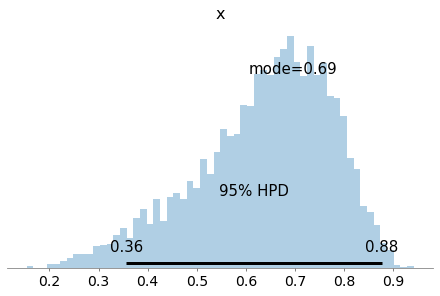

In [2]:
# Exercise 10.2 (B)
import pymc3 as pm
import numpy as np
from matplotlib import pyplot as plt

with pm.Model() as model:
    N = 2 # Number of factories
    data = np.array([0,0,0,1,1,1,1,1,1])  # N = 9, z = 6
    κ = 12 # Concentration for prior
    m = pm.Categorical('m',p=[.5,.5])  # Prior probabilities for model index
    ω = pm.math.switch(m, .75, .25)  # Switch to decide which ω to use
    θ = pm.Beta('θ', ω*(κ-2)+1, (1-ω)*(κ-2)+1)  # θ prior    
    y = pm.Bernoulli('y', p=θ, observed=data, shape=N) # Likelihoods

    prior = pm.sample_prior_predictive(10000) 
    trace = pm.sample(10000,step=pm.Metropolis())

pm.plot_posterior(trace['θ'],point_estimate='mode', credible_interval=.95, kind="his")

plt.show()

<font color='red'> 
(C) Use the script to reproduce the previous exercise. That is, change the data to
z = 7 heads in N = 10, and run the script once with κ = 6 and once with κ = 202.
Do the MCMC results match the analytical results?
</font>
<font color='blue'> 
Yes, the results match the analytical results if we only check the posterior probabilities. But the problem is using MCMC where k=202. It will throw an error as you can see below, however, it is fine with k=6. The error does not tell us the problem. I believe the reason is that the MCMC chain gets stuck in m1 or m2. The MCMC jumps to the other model rarely due to high kappa value (Concentration). We can resolve it using pseudo-priors.
</font>

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [θ]
>Metropolis: [m]
Sampling 2 chains, 0 divergences: 100%|██████████| 21000/21000 [00:06<00:00, 3412.72draws/s]
The number of effective samples is smaller than 25% for some parameters.


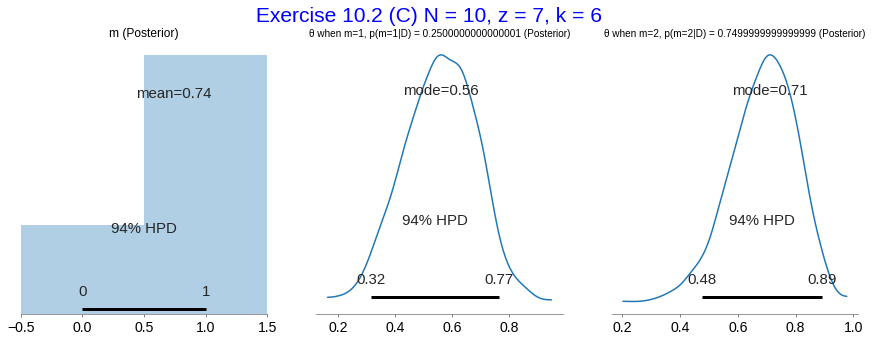

In [3]:
# Exercise 10.2 (C) z = 7 heads in N = 10, and run the script once with κ = 6
import pymc3 as pm
import numpy as np
from matplotlib import pyplot as plt
import scipy.special as ss


with pm.Model() as modelK6:
    N = 2 # Number of factories
    data = np.array([0,0,0,1,1,1,1,1,1,1])  # N = 10, z = 7
    κ = 6 # Concentration for prior
    m = pm.Categorical('m',p=[.5,.5])  # Prior probabilities for model index
    ω = pm.math.switch(m, .75, .25)  # Switch to decide which ω to use
    θ = pm.Beta('θ', ω*(κ-2)+1, (1-ω)*(κ-2)+1)  # θ prior    
    y = pm.Bernoulli('y', p=θ, observed=data, shape=N) # Likelihoods

    prior = pm.sample_prior_predictive(10000)  # TODO  
    trace = pm.sample(10000,step=pm.Metropolis())


z = 7
N = 10
# Equation 10.6
pD = lambda z,N,a,b : np.exp(ss.betaln(z+a, N-z+b)-ss.betaln(a,b)) 

## Prior for tail-biased factory k 6
ω1=0.25; κ1=6
pDm1k6 = pD(z, N, ω1*(κ1-2)+1, (1-ω1)*(κ1-2)+1)
# print("p(D | m=1 ) = " + str(pDm1k6))

## Prior for head-biased factory k 6
ω2=0.75; κ2=6
pDm2k6 = pD(z, N, ω2*(κ2-2)+1, (1-ω2)*(κ2-2)+1) 
# print("p(D | m=2 ) = " + str(pDm2k6))


## Bayes factor k6
BF_k6 = pDm1k6/pDm2k6

# Compute posterior probabilities p. 271 (k202)
post_k6_m1 = BF_k6 / (1 + BF_k6) 
post_k6_m2 = 1 - post_k6_m1

# Posterior plots
fig, (posterior_ax1, posterior_ax2, posterior_ax3) = plt.subplots(1,3,figsize=(15,5))
fig.suptitle(' Exercise 10.2 (C) N = 10, z = 7, k = 6', color='blue', fontsize='21')
plt.style.use('seaborn-darkgrid')
fig.subplots_adjust(hspace = 0.5)

pm.plot_posterior(trace['m'], ax=posterior_ax1, point_estimate='mean')
pm.plot_posterior(trace['θ'][trace['m']==0], ax=posterior_ax2, point_estimate='mode')
pm.plot_posterior(trace['θ'][trace['m']==1], ax=posterior_ax3, point_estimate='mode')
posterior_ax1.set_title('m (Posterior)')
posterior_ax2.set_title(f'θ when m=1, p(m=1|D) = {post_k6_m1} (Posterior)', fontsize=10)
posterior_ax3.set_title(f'θ when m=2, p(m=2|D) = {post_k6_m2} (Posterior)', fontsize=10)

plt.show()

In [4]:
# Exercise 10.2 (C) z = 7 heads in N = 10, and run the script once with κ = 202
with pm.Model() as modelK202:
    N = 2 # Number of factories
    data = np.array([0,0,0,1,1,1,1,1,1,1])  # N = 10, z = 7
    κ = 202 # Concentration for prior
    m = pm.Categorical('m',p=[.5,.5])  # Prior probabilities for model index
    ω = pm.math.switch(m, .75, .25)  # Switch to decide which ω to use
    θ = pm.Beta('θ', ω*(κ-2)+1, (1-ω)*(κ-2)+1)  # θ prior    
    y = pm.Bernoulli('y', p=θ, observed=data, shape=N) # Likelihoods

    prior = pm.sample_prior_predictive(10000)  # TODO  
    trace = pm.sample(10000,step=pm.Metropolis())


## Prior for tail-biased factory k 202
ω1=0.25; κ1=202
pDm1k202 = pD(z, N, ω1*(κ1-2)+1, (1-ω1)*(κ1-2)+1)
# print("p(D | m=1 ) = " + str(pDm1))

## Prior for head-biased factory k 202
ω2=0.75; κ2=202
pDm2k202 = pD(z, N, ω2*(κ2-2)+1, (1-ω2)*(κ2-2)+1) 
# print("p(D | m=2 ) = " + str(pDm2))


## Bayes factor k202
BF_k202 = pDm1k202/pDm2k202

# Compute posterior probabilities p. 271 (k202)
post_k202_m1 = BF_k202 / (1 + BF_k202) 
post_k202_m2 = 1 - post_k202_m1

# Posterior plots
# fig, (posterior_ax1, posterior_ax2, posterior_ax3) = plt.subplots(1,3,figsize=(15,5))
fig.suptitle(' Exercise 10.2 (C) N = 10, z = 7, k = 6', color='blue', fontsize='21')
plt.style.use('seaborn-darkgrid')
fig.subplots_adjust(hspace = 0.5)

pm.plot_posterior(trace['m'], ax=posterior_ax1, point_estimate='mean')
pm.plot_posterior(trace['θ'][trace['m']==0], ax=posterior_ax2, point_estimate='mode')
pm.plot_posterior(trace['θ'][trace['m']==1], ax=posterior_ax3, point_estimate='mode')
posterior_ax1.set_title('m (Posterior)')
posterior_ax2.set_title(f'θ when m=1, p(m=1|D) = {post_k202_m1} (Posterior)', fontsize=10)
posterior_ax3.set_title(f'θ when m=2, p(m=2|D) = {post_k202_m2} (Posterior)', fontsize=10)

plt.show()

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [θ]
>Metropolis: [m]
Sampling 2 chains, 0 divergences: 100%|██████████| 21000/21000 [00:06<00:00, 3248.51draws/s]
/home/neutron/anaconda3/envs/PP/lib/python3.8/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
The number of effective samples is smaller than 25% for some parameters.
/home/neutron/anaconda3/envs/PP/lib/python3.8/site-packages/arviz/data/base.py:140: SyntaxWarning: More chains (1) than draws (0). Passed array should have shape (chains, draws, *shape)
  warnings.warn(
/home/neutron/anaconda3/envs/PP/lib/python3.8/site-packages/arviz/plots/kdeplot.py:259: UserWarning: kde plot failed, you may want to check your data
  warnings.warn("kde plot failed, you may want to check your data")


ValueError: Too few elements for interval calculation. Check that credible_interval meets condition 0 =< credible_interval < 1

<font color='grey'> 
4)Exercise 10.3 (B). We have seen in the block of code after using pseudopriors to reduce autocorrelation some of the results in Figures 10.5 and 10.6. In this exercise, your task is to take this block of code as a basis to update the pseudo-priors as specified in Exercise 10.3 (B) and report the results.
    </font>
<br> 
<font color='red'> 
Exercise 10.3. [Purpose: To get some hands-on experience with pseudo-
priors.]
<br>  
(A) Use the script Jags-Ydich-Xnom1subj-MbernBetaModelCompPseudoPrior.R
to reproduce Figures 10.5 and 10.6. That is, run the script once with the pseudo-prior
set to the true prior, and then again with the pseudo-prior set to the values shown
in the text. Include the graphical output of the chain diagnostics on the model index.
Your results will differ slightly from Figures 10.5 and 10.6 because of randomness in the
MCMC chain.
<br>
(B) Change the pseudo-prior to broad distributions, with omega1[2] = omega2[1] =
0.5 and kappa1[2] = kappa2[1] = 2.1 . Run the script and report the results, including
the chain diagnostic on the model index. Discuss.
    </font>
    
<font color='blue'> 
We can see that the autocorrelation is between the autocorrelation of using true prior (Figures 10.5) and the autocorrelation of using pseudo-prior (Figures 10.6). Since setting pseudo-prior to 0.5 for ω1 will cover both the true prior (0.10) and the pseudo-prior (0.40, posterior). Therefore, autocorrelation is as reasonable as setting it to (0.40). However, setting pseudo-prior to 0.5 for ω2 does not cover both the true prior (0.90) and the pseudo-prior (0.70, posterior). Therefore, we can see autocorrelation is not as reasonable as setting it to (0.70). Note we want a low autocorrelation.
    </font>

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>BinaryGibbsMetropolis: [m]
>NUTS: [θ2, θ1]
Sampling 2 chains, 668 divergences: 100%|██████████| 21000/21000 [00:20<00:00, 1046.63draws/s]
There were 196 divergences after tuning. Increase `target_accept` or reparameterize.
There were 472 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/home/neutron/anaconda3/envs/PP/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(


     mean     sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
m   0.907  0.290   0.000    1.000      0.049    0.035      35.0    35.0   
θ1  0.486  0.277   0.033    0.964      0.003    0.003   11482.0  3560.0   
θ2  0.668  0.102   0.488    0.871      0.017    0.012      36.0    36.0   

    ess_bulk  ess_tail  r_hat  
m       35.0      35.0   1.06  
θ1   15177.0   10888.0   1.01  
θ2      78.0      21.0   1.03  


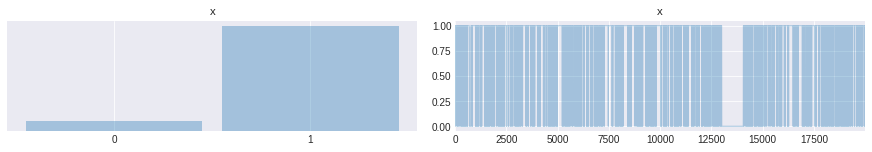

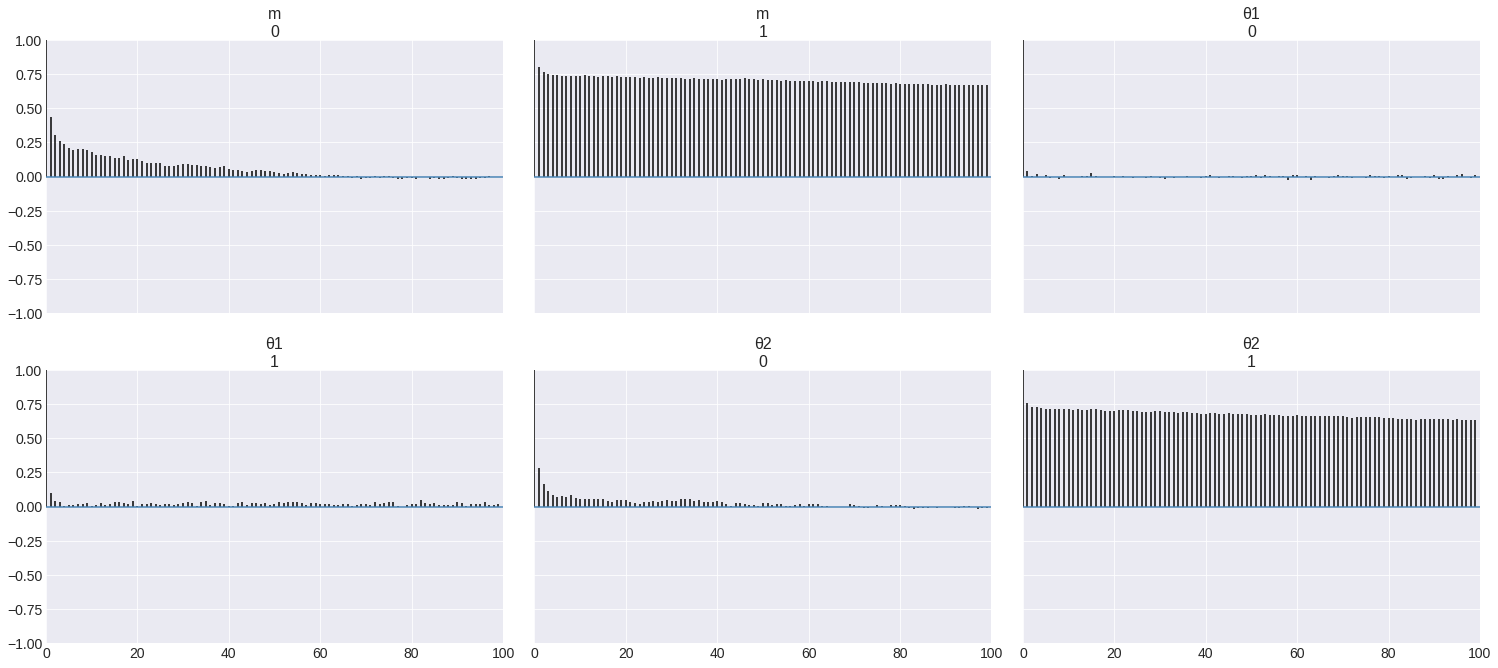

In [5]:
# Exercise 10.3 B)
import pymc3 as pm
import numpy as np
from matplotlib import pyplot as plt

N = 2 # Number of factories
data = np.concatenate((np.zeros(30-17),
                       np.ones(17)))  # N = 30, z = 17

ω1 = [0.10,  # true ω1 prior
      0.50]  # pseudo ω1 prior (posterior ω, obtained after running with equal true and pseudo priors) 0.40
             
    
κ1 = [20,    # true κ1 prior
      2.1]    # pseudo κ1 prior (increased by number of new experiments, 30)

ω2 = [0.90,  # true ω2 prior
      0.50]  # pseudo ω2 prior (posterior ω, obtained after running with equal true and pseudo priors) 0.7
    
κ2 = [20,   # true κ2 prior
      2.1]   # pseudo κ2 prior (increased by number of new experiments, 30)


with pm.Model() as model_pseudoprior:
    
    m = pm.Categorical('m',p=[.5,.5])  # Prior probabilities for model index

    # We use a switch to choose true or pseudo priors based on m
    # (by default)
    chosen_ω1 = pm.math.switch(pm.math.eq(m,0),ω1[0],ω1[1])
    chosen_κ1 = pm.math.switch(pm.math.eq(m,0),κ1[0],κ1[1])
    chosen_ω2 = pm.math.switch(pm.math.eq(m,1),ω2[0],ω2[1])
    chosen_κ2 = pm.math.switch(pm.math.eq(m,1),κ2[0],κ2[1])
    
    θ1 = pm.Beta('θ1', chosen_ω1*(chosen_κ1-2)+1, (1-chosen_ω1)*(chosen_κ1-2)+1) # θ1 prior
    θ2 = pm.Beta('θ2', chosen_ω2*(chosen_κ2-2)+1, (1-chosen_ω2)*(chosen_κ2-2)+1) # θ2 prior
    
    θ = pm.math.switch(pm.math.eq(m,0), θ1, θ2)  # Switch to decide which θ to use
    y = pm.Bernoulli('y', p=θ, observed=data, shape=N) # Likelihood

    trace = pm.sample(10000)

    pm.traceplot(trace['m'])
    pm.autocorrplot(trace) 
    print(pm.stats.summary(trace))

plt.show()